# Homework 5
Due Date: 04/21/2022, 11:59 pm

Please use the cell below, get the "American National Election Studies of 1996" dataset, then the answer the questions below.

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
anes96 = sm.datasets.anes96
df = anes96.load_pandas().data

### Questions/Tasks
1. After loading data as a dataframe, carry out a typical EDA (check the shape, data types, min/max values, etc.)
2. Visualize the histogram of all features and the correlation matrix.

3. Use hypothesis testing methods and which ones of these have an affect on people's votes (0: Clinton, 1:Dole) <br>
 a. Population  <br>
 b. TVnews <br>
 c. Age <br>
 d. Education <br>
 e. Income <br>

4. Use Chi-square test of independence and answer the following quesion: If we assume that people who make less than $50k a year are poor, can we say that poor people favor one candidate over another?

5. Use Fisher's exact test and answer the following quesion: If we assume that people who are under 40 years are young, can we say that young people favor one candidate over another?

6. Use Welch's t-test and answer the following question: is there a difference in votes between people with a higher education degree (college, MS, or PhD) and without a higher education degree

In [41]:
# 1. exploring the dataframe and performing EDA.

df.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0,0.0,3.437208
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0,0.0,4.420045
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0,0.0,6.461624


In [42]:
df.shape

(944, 11)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   popul     944 non-null    float64
 1   TVnews    944 non-null    float64
 2   selfLR    944 non-null    float64
 3   ClinLR    944 non-null    float64
 4   DoleLR    944 non-null    float64
 5   PID       944 non-null    float64
 6   age       944 non-null    float64
 7   educ      944 non-null    float64
 8   income    944 non-null    float64
 9   vote      944 non-null    float64
 10  logpopul  944 non-null    float64
dtypes: float64(11)
memory usage: 81.2 KB


In [44]:
df.describe()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314,2.472307
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208,3.187043
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000,-2.302585
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000,0.095310
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000,3.095578
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000,4.701389
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000,8.895643


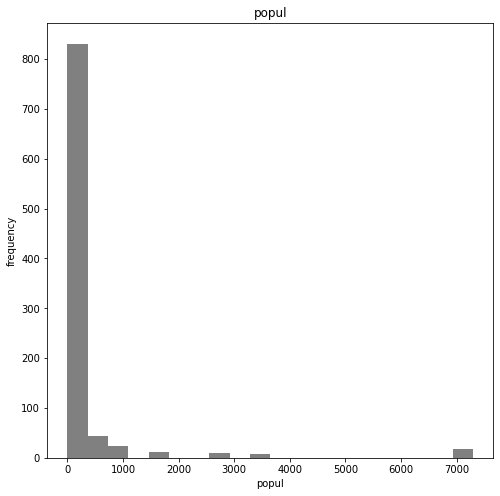

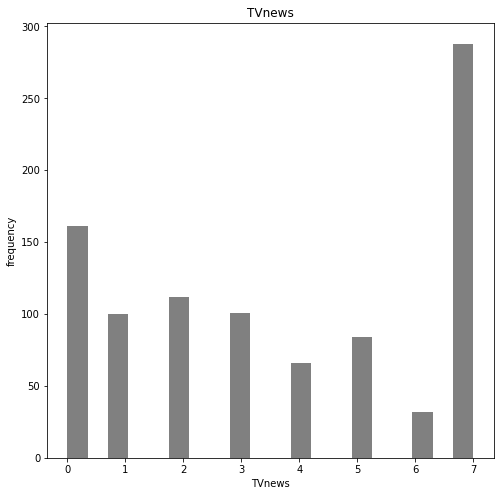

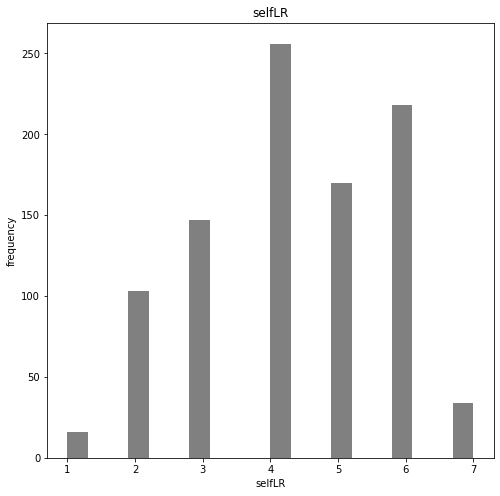

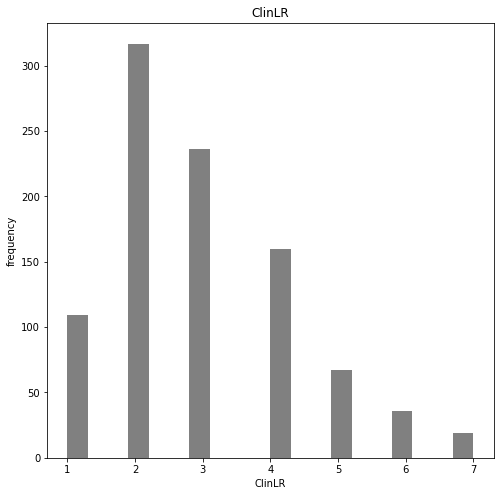

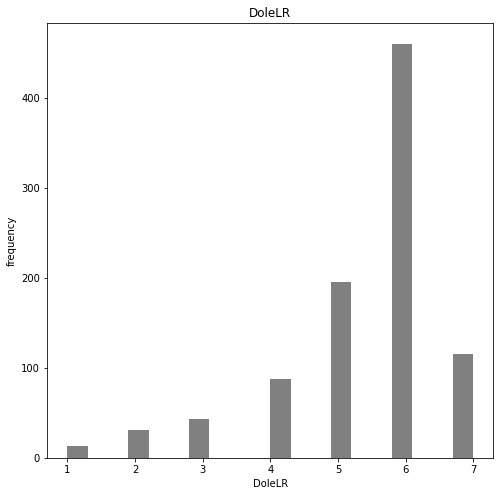

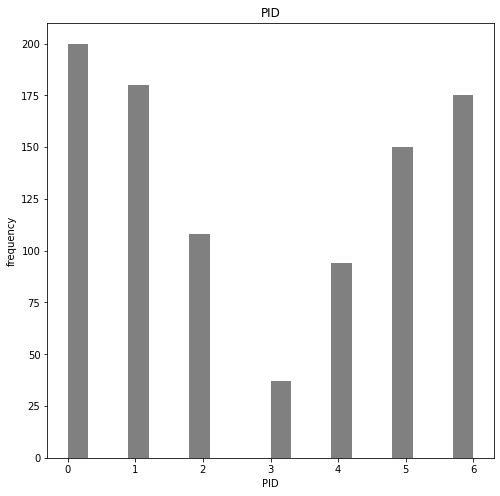

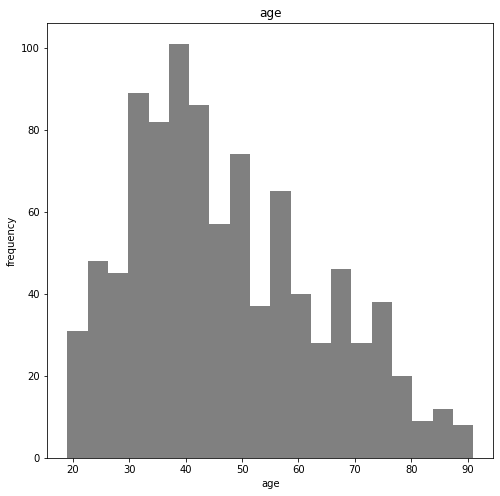

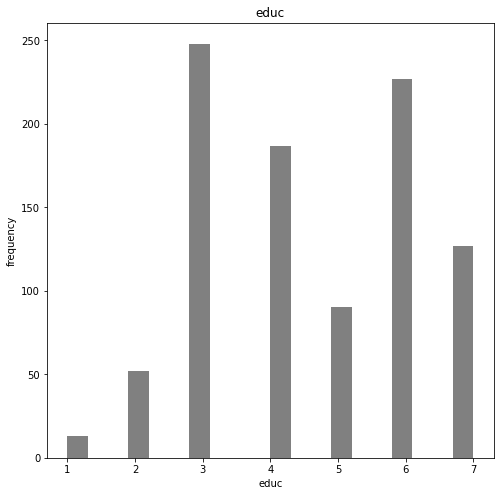

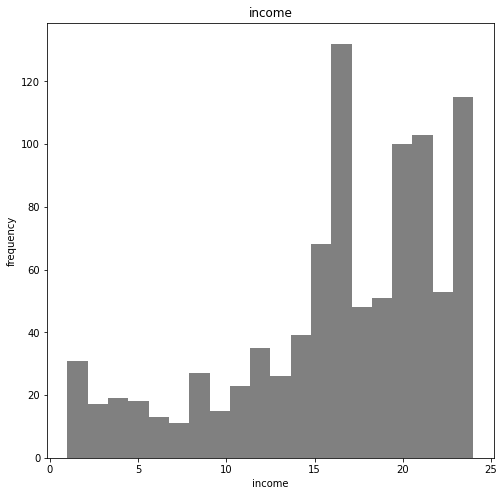

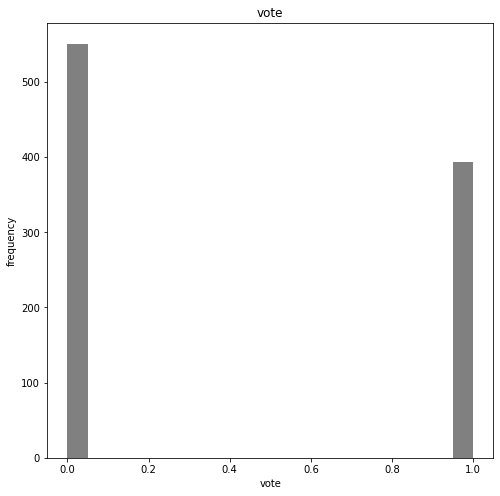

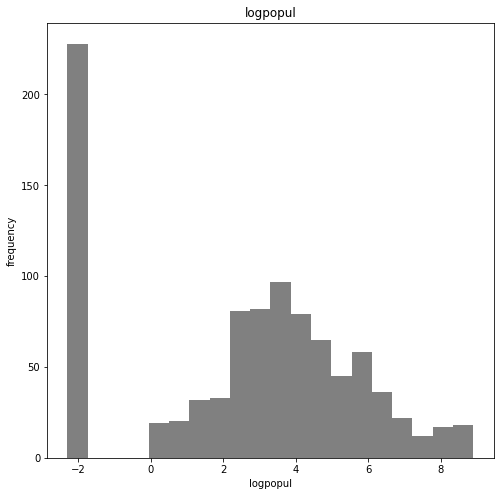

In [45]:
# 2. plotting the histogram for all columns in the dataframe.

import seaborn as sns
import matplotlib.pyplot as plt

for i in df.columns:
    df[i].plot.hist(bins=20,figsize=(8, 8),color='gray')

    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.title(i)
    plt.show()



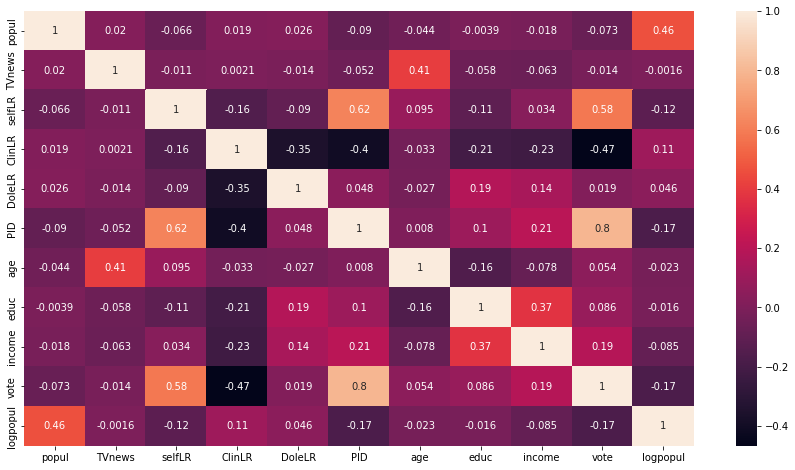

In [46]:
# 2. checking the correlation between the columns.

corrMatrix= df.corr(method='pearson')
plt.figure(figsize = (15,8))
sns.heatmap(corrMatrix, annot= True)
plt.show()

In [47]:
df.var()   #variance of each feature

popul       1.172037e+06
TVnews      7.167585e+00
selfLR      2.069099e+00
ClinLR      1.914696e+00
DoleLR      1.611248e+00
PID         5.168061e+00
age         2.697192e+02
educ        2.557718e+00
income      3.569801e+01
vote        2.432543e-01
logpopul    1.015725e+01
dtype: float64

In [48]:
df.mean()  #means of each feature

popul       306.381356
TVnews        3.727754
selfLR        4.325212
ClinLR        2.939619
DoleLR        5.394068
PID           2.842161
age          47.043432
educ          4.565678
income       16.331568
vote          0.416314
logpopul      2.472307
dtype: float64

In [49]:
# 3. Performing the hypothesis testing

from scipy import stats

#a. null hypothesis1:  the population has no affect on the people vote's

ttest_popul = stats.spearmanr(df['popul'], df['vote'])    #Spearman’s Rank Correlation test
if ttest_popul.pvalue > 0.05:
  print("p.value:", ttest_popul.pvalue,", we cannot reject null hypothesis: the population has no affect on the people vote's ")
else:
  print("p.value:", ttest_popul.pvalue,", we reject null hypothesis: the population has affect on the people vote's ")

#b. null hypothesis2: the TVnews has no affect on the people vote's

ttest_TV_news = stats.spearmanr(df['TVnews'], df['vote'])    #Spearman’s Rank Correlation test
if ttest_TV_news.pvalue > 0.05:
  print("p.value:", ttest_TV_news.pvalue,", we cannot reject null hypothesis: the TVnews has no affect on the people vote's ")
else:
  print("p.value:", ttest_TV_news.pvalue,", we reject null hypothesis: the TVnews has affect on the people vote's ")

#c. null hypothesis3: the Age has no affect on the people vote's

ttest_age = stats.spearmanr(df['age'], df['vote'])    #Spearman’s Rank Correlation test
if ttest_age.pvalue > 0.05:
  print("p.value:", ttest_age.pvalue,", we cannot reject null hypothesis: the Age has no affect on the people vote's ")
else:
  print("p.value:", ttest_age.pvalue,", we reject null hypothesis: the Age has affect on the people vote's ")


#d. null hypothesis4: the education has no affect on the people vote's

ttest_educ = stats.spearmanr(df['educ'], df['vote'])    #Spearman’s Rank Correlation test
if ttest_educ.pvalue > 0.05:
  print("p.value:", ttest_educ.pvalue,", we cannot reject null hypothesis: the education has no affect on the people vote's ")
else:
  print("p.value:", ttest_educ.pvalue,", we reject null hypothesis: the education has affect on the people vote's ")


#e. null hypothesis5: the income has no affect on the people vote's

ttest_income = stats.spearmanr(df['income'], df['vote'])    #Spearman’s Rank Correlation test
if ttest_income.pvalue > 0.05:
  print("p.value:", ttest_income.pvalue,", we cannot reject null hypothesis: the income has no affect on the people vote's ")
else:
  print("p.value:", ttest_income.pvalue,", we reject null hypothesis: the income has affect on the people vote's ")


p.value: 8.790782404409272e-08 , we reject null hypothesis: the population has affect on the people vote's 
p.value: 0.5905808279066198 , we cannot reject null hypothesis: the TVnews has no affect on the people vote's 
p.value: 0.1051858932465616 , we cannot reject null hypothesis: the Age has no affect on the people vote's 
p.value: 0.009120353964624855 , we reject null hypothesis: the education has affect on the people vote's 
p.value: 5.488419209917467e-09 , we reject null hypothesis: the income has affect on the people vote's 


In [64]:
# 4.Use Chi-square test of independence, If we assume that people who make less than $50k a year are poor, can we say poor people favor one candidate over another.

from scipy.stats import chi2_contingency

df['income_categorization']= df['income'].apply(lambda x: 'poor' if x< 20 else 'rich')  #income <20 is nothing but <50K per year.
df['vote_category']= df['vote'].apply(lambda x: 'Clinton' if x ==0 else 'Dole')

## null hypothesis: people with income <50K (poor) treat each candidate equally.

contingency = pd.crosstab(df['income_categorization'], df['vote_category'])
print(contingency)

contingency_perc = pd.crosstab(df['income_categorization'], df['vote_category'],normalize='index')
print("\n\n",contingency_perc)

c, p, dof, expected = chi2_contingency(contingency)
print("\n",p)    #since the p value is <0.05, we reject null hypothesis.

if p<0.05:
    print("\n","reject null hypothesis: people with income <50K (poor) doesn't treat each candidate equally ")
else:
    print("\n","accept null hypothesis: people with income <50K (poor) treat each candidate equally")



vote_category          Clinton  Dole
income_categorization               
poor                       370   203
rich                       181   190


 vote_category           Clinton      Dole
income_categorization                    
poor                   0.645724  0.354276
rich                   0.487871  0.512129

 2.160035353382087e-06

 reject null hypothesis: people with income <50K (poor) doesn't treat each candidate equally 


In [51]:
#5.Use Fisher's exact test, If we assume that people who are under 40 years are young, can we say that young people favor one candidate over another.

from scipy.stats import fisher_exact

df['age_category']= df['age'].apply(lambda x: 'young' if x<40 else 'old')    #creating a age_category based on the assumption given.

#null hypothesis: young people have treated each candidate equally.

age_vote_df = pd.crosstab(df['age_category'], df['vote_category'])   #grouping the data based assumption given on age_category
print(age_vote_df)

age_vote_df_perc = pd.crosstab(df['age_category'], df['vote_category'],normalize='index') 
print("\n\n",age_vote_df_perc)

oddsratio, pvalue = fisher_exact(table=age_vote_df.to_numpy())
print("\n",oddsratio, pvalue)    # p-value > 0.05, we cannot reject null hypothesis.

if pvalue<0.05:
    print("\n","reject null hypothesis: young people haven't treated each candidate equally")
else:
    print("\n","accept null hypothesis: young people have treated each candidate equally")

vote_category  Clinton  Dole
age_category                
old                335   240
young              216   153


 vote_category   Clinton      Dole
age_category                     
old            0.582609  0.417391
young          0.585366  0.414634

 0.9887152777777778 0.9461435054718713

 accept null hypothesis: young people have treated each candidate equally


In [63]:
#6. Use Welch's t-test, is there a difference in votes between people with a higher education degree (college, MS, or PhD) and without a higher education degree

df['educ_category']= df['educ'].apply(lambda x: 'high_edu_degree' if x > 4 else 'no_high_edu_degree')

#null hypothesis:  there is no difference in votes between people with higher degree and no degree.

educ_vote_df = pd.crosstab(df['educ_category'],df['vote_category'])
print(educ_vote_df)

educ_vote_df_perc= pd.crosstab(df['educ_category'],df['vote_category'],normalize='index')
print("\n\n",educ_vote_df_perc)

#welch's independent t-test with unequal variance

a= df[df['educ_category']=='high_edu_degree'].vote
b= df[df['educ_category']=='no_high_edu_degree'].vote
ttest,pvalue= stats.ttest_ind(a,b , equal_var = False)  # p value <0.05, we reject null hypothesis.
print("\n",ttest,pvalue)

if pvalue<0.05:
    print("\n","reject null hypothesis: there is a difference in votes between people with higher degree and no degree")
else:
    print("\n","accept null hypothesis: there is no difference in votes between people with higher degree and no degree")


vote_category       Clinton  Dole
educ_category                    
high_edu_degree         244   200
no_high_edu_degree      307   193


 vote_category       Clinton     Dole
educ_category                       
high_edu_degree     0.54955  0.45045
no_high_edu_degree  0.61400  0.38600

 2.0045561229383986 0.04530199594338823

 reject null hypothesis: there is a difference in votes between people with higher degree and no degree
